In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# import file
data= "/Users/chris/Documents/Resources/unemployment_rate_by_county_combined.csv"
# encoding='iso-8859-1', low_memory=False
# Read files as CSV
data_read = pd.read_csv(data,delimiter='|')
data_read

,Code1,Code2,Code3,County Name/State Abbreviation,Year,Labor Force,Employed,Unemployed,Unemployment (%)
0,CN0100100000000,1,1,"Autauga County, AL",2008,"24,687","23,420","1,267",5.1
1,CN0100300000000,1,3,"Baldwin County, AL",2008,"83,223","79,372","3,851",4.6
2,CN0100500000000,1,5,"Barbour County, AL",2008,"10,161","9,267",894,8.8
3,CN0100700000000,1,7,"Bibb County, AL",2008,"8,749","8,241",508,5.8
4,CN0100900000000,1,9,"Blount County, AL",2008,"26,698","25,453","1,245",4.7
5,CN0101100000000,1,11,"Bullock County, AL",2008,"3,634","3,251",383,10.5
6,CN0101300000000,1,13,"Butler County, AL",2008,"9,051","8,278",773,8.5
7,CN0101500000000,1,15,"Calhoun County, AL",2008,"54,564","51,468","3,096",5.7
8,CN0101700000000,1,17,"Chambers County, AL",2008,"15,012","12,848","2,164",14.4
9,CN0101900000000,1,19,"Cherokee County, AL",2008,"11,996","11,308",688,5.7


In [3]:
# Keeping meaningfull columns
data2= data_read.drop(["Code1","Code2","Code3","Labor Force","Employed","Unemployed"],axis=1)

# Rename county header for later merge
data3 = data2.rename(columns={"County Name/State Abbreviation":"County"})

# Transform the type of unemployment from string to numeric
data3['Unemployment (%)'] = data3['Unemployment (%)'].apply(pd.to_numeric)

data3

,County,Year,Unemployment (%)
0,"Autauga County, AL",2008,5.1
1,"Baldwin County, AL",2008,4.6
2,"Barbour County, AL",2008,8.8
3,"Bibb County, AL",2008,5.8
4,"Blount County, AL",2008,4.7
5,"Bullock County, AL",2008,10.5
6,"Butler County, AL",2008,8.5
7,"Calhoun County, AL",2008,5.7
8,"Chambers County, AL",2008,14.4
9,"Cherokee County, AL",2008,5.7


In [4]:
# Pivotting the data for later merge and comparison
chris_metric = data3.pivot(index="County",columns="Year",values="Unemployment (%)")
chris_metric

Year,2008,2012,2016
County,,,
"Abbeville County, SC",8.1,10.6,5.3
"Acadia Parish, LA",4.2,6.0,7.4
"Accomack County, VA",5.0,7.9,4.8
"Ada County, ID",4.9,6.2,3.3
"Adair County, IA",4.1,4.4,3.0
"Adair County, KY",6.8,9.5,6.6
"Adair County, MO",5.3,7.0,5.7
"Adair County, OK",4.9,9.1,6.0
"Adams County, CO",5.4,9.4,3.6


In [5]:
# Reading Counties that flipped to red
source = "/Users/chris/Documents/Resources/FlippedCounties.csv"
source_reader = pd.read_csv(source)

# Transforming objects to string to remove % sign
source_reader['Trump 2016'] = source_reader['2016'].str.strip('%')
source_reader['Obama 2012'] = source_reader["2012"].str.strip('%')
source_reader['Obama 2008'] = source_reader["2008"].str.strip('%')

# Dropping unneeded columns
source_reader = source_reader.drop(["State","2016","2012","2008"],axis=1)

source_reader

,County,State2,Trump 2016,Obama 2012,Obama 2008
0,Woodruff County,Arkansas,8.91,4.21,7.46
1,Conejos County,Colorado,3.56,9.22,12.93
2,Huerfano County,Colorado,6.61,8.27,11.23
3,Las Animas County,Colorado,15.60,2.65,7.04
4,Pueblo County,Colorado,0.50,13.99,14.97
5,Windham County,Connecticut,7.78,13.28,14.68
6,Kent County,Delaware,4.87,4.94,9.81
7,Jefferson County,Florida,5.06,1.75,3.66
8,Monroe County,Florida,6.82,0.44,4.90
9,Pinellas County,Florida,1.11,5.65,8.25


In [6]:
#States Abbreviation to have the county name in the same format as other data
us_state_abbrev = {

   'Alabama': 'AL',

   'Alaska': 'AK',

   'Arizona': 'AZ',

   'Arkansas': 'AR',

   'California': 'CA',

   'Colorado': 'CO',

   'Connecticut': 'CT',

   'Delaware': 'DE',

   'Florida': 'FL',

   'Georgia': 'GA',

   'Hawaii': 'HI',

   'Idaho': 'ID',

   'Illinois': 'IL',

   'Indiana': 'IN',

   'Iowa': 'IA',

   'Kansas': 'KS',

   'Kentucky': 'KY',

   'Louisiana': 'LA',

   'Maine': 'ME',

   'Maryland': 'MD',

   'Massachusetts': 'MA',

   'Michigan': 'MI',

   'Minnesota': 'MN',

   'Mississippi': 'MS',

   'Missouri': 'MO',

   'Montana': 'MT',

   'Nebraska': 'NE',

   'Nevada': 'NV',

   'New Hampshire': 'NH',

   'New Jersey': 'NJ',

   'New Mexico': 'NM',

   'New York': 'NY',

   'North Carolina': 'NC',

   'North Dakota': 'ND',

   'Ohio': 'OH',

   'Oklahoma': 'OK',

   'Oregon': 'OR',

   'Pennsylvania': 'PA',

   'Rhode Island': 'RI',

   'South Carolina': 'SC',

   'South Dakota': 'SD',

   'Tennessee': 'TN',

   'Texas': 'TX',

   'Utah': 'UT',

   'Vermont': 'VT',

   'Virginia': 'VA',

   'Washington': 'WA',

   'West Virginia': 'WV',

   'Wisconsin': 'WI',

   'Wyoming': 'WY',
}

In [7]:
# Creating new county name that encompasses county name and abbreviated state
source_reader["Abb"]=source_reader["State2"].map(us_state_abbrev)
source_reader["County Name"]= source_reader["County"]+ ", "+ source_reader["Abb"]

# Dropping unneeded columns
dataset1 = source_reader.drop(["County","State2","Abb"],axis=1)
# Transforming County to string
dataset1['County'] = dataset1["County Name"].astype('str')
# Resetting Index
#dataset1=dataset1.set_index("County")
# Dropping County Name
dataset1 = dataset1.drop(["County Name"],axis=1)
# changing votes from string to numeric
dataset1['Trump Margin of votes 2016'] = pd.to_numeric(dataset1['Trump 2016'])
dataset1['Obama Margin of votes 2012'] = pd.to_numeric(dataset1['Obama 2012'])
dataset1['Obama Margin of votes 2008'] = pd.to_numeric(dataset1['Obama 2008'])

dataset1 = dataset1.drop(["Trump 2016","Obama 2012","Obama 2008"],axis=1)

dataset1

,County,Trump Margin of votes 2016,Obama Margin of votes 2012,Obama Margin of votes 2008
0,"Woodruff County, AR",8.91,4.21,7.46
1,"Conejos County, CO",3.56,9.22,12.93
2,"Huerfano County, CO",6.61,8.27,11.23
3,"Las Animas County, CO",15.60,2.65,7.04
4,"Pueblo County, CO",0.50,13.99,14.97
5,"Windham County, CT",7.78,13.28,14.68
6,"Kent County, DE",4.87,4.94,9.81
7,"Jefferson County, FL",5.06,1.75,3.66
8,"Monroe County, FL",6.82,0.44,4.90
9,"Pinellas County, FL",1.11,5.65,8.25


In [8]:
Trump_avg_votes= dataset1["Trump Margin of votes 2016"].mean()
Trump_avg_votes

11.447621359223296

In [9]:
combined=pd.merge(chris_metric, dataset1, left_index= True, right_on ="County", how="right")
combined=combined.set_index("County")
combined_df=combined.rename(columns={2008:"Unemp. Rate 2008",2012:"Unemp. Rate 2012",2016:"Unemp. Rate 2016"})
combined_df


,Unemp. Rate 2008,Unemp. Rate 2012,Unemp. Rate 2016,Trump Margin of votes 2016,Obama Margin of votes 2012,Obama Margin of votes 2008
County,,,,,,
"Woodruff County, AR",8.0,10.2,5.5,8.91,4.21,7.46
"Conejos County, CO",7.3,10.6,4.9,3.56,9.22,12.93
"Huerfano County, CO",6.4,14.2,6.4,6.61,8.27,11.23
"Las Animas County, CO",4.5,12.0,5.2,15.60,2.65,7.04
"Pueblo County, CO",6.1,10.7,4.9,0.50,13.99,14.97
"Windham County, CT",6.6,9.4,5.5,7.78,13.28,14.68
"Kent County, DE",4.9,7.9,4.7,4.87,4.94,9.81
"Jefferson County, FL",5.2,9.2,5.3,5.06,1.75,3.66
"Monroe County, FL",4.2,5.7,3.2,6.82,0.44,4.90


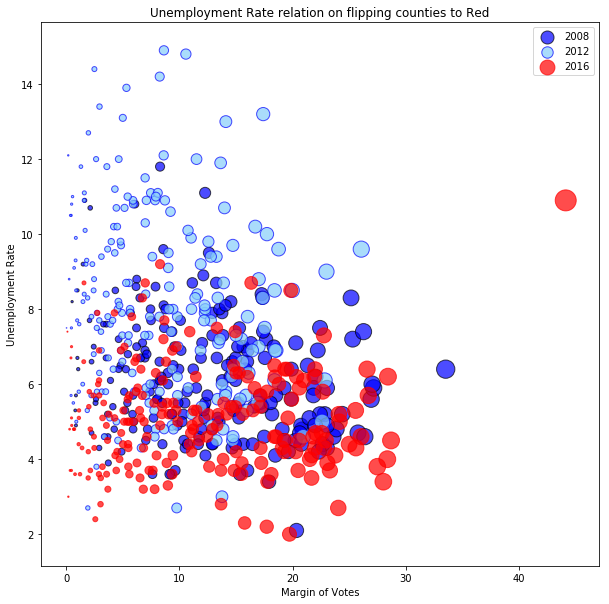

In [10]:
# Create a plot in Matplotlib
plt.figure(figsize=(10,10))
plt.scatter(combined_df['Obama Margin of votes 2008'], combined_df['Unemp. Rate 2008'], color='blue', alpha=0.7,
            edgecolors='black', s=10*combined_df['Obama Margin of votes 2008'],label= "2008")
plt.scatter(combined_df['Obama Margin of votes 2012'], combined_df['Unemp. Rate 2012'], color='lightskyblue', alpha=0.7,
            edgecolors='blue',s=10*combined_df['Obama Margin of votes 2012'], label= "2012")
plt.scatter(combined_df['Trump Margin of votes 2016'], combined_df['Unemp. Rate 2016'], color='red', alpha=0.7,
            edgecolors='red', s=10*combined_df['Trump Margin of votes 2016'], label="2016")

plt.title('Unemployment Rate relation on flipping counties to Red')
plt.legend(loc="best")
plt.xlabel('Margin of Votes')
plt.ylabel('Unemployment Rate')

plt.show()

In [11]:
# Only to get US Unemployment rates
us_unemployment_data= "/Users/chris/Documents/Resources/us_unemployment.csv"
us_unemployment= pd.read_csv(us_unemployment_data,delimiter='|')
us_unemployment

,Year,Annual
0,2008,5.8
1,2009,9.3
2,2010,9.6
3,2011,8.9
4,2012,8.1
5,2013,7.4
6,2014,6.2
7,2015,5.3
8,2016,4.9


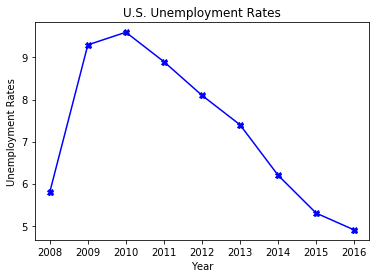

In [12]:
# Plotting US unemployment Rate
Year=[2008,2009,2010,2011,2012,2013,2014,2015,2016]
Annual=[5.8,9.3,9.6,8.9,8.1,7.4,6.2,5.3,4.9]
us_data, = plt.plot(Year, Annual, color="blue", marker="X", label="US Unemployment Rate" )
plt.title('U.S. Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rates')

plt.show()

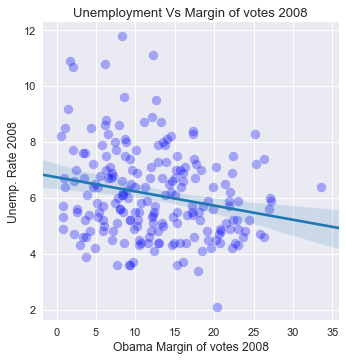

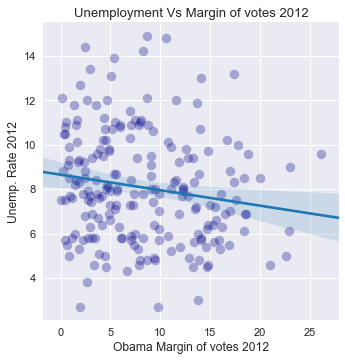

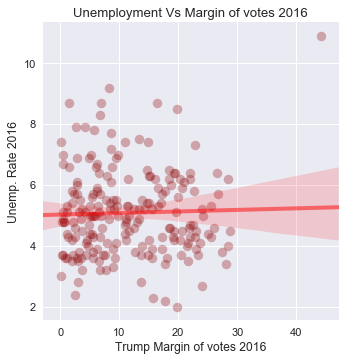

In [13]:
# Set style of scatterplot
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.1)
#sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Obama Margin of votes 2008','Unemp. Rate 2008', data=combined_df, fit_reg=True, scatter_kws={"color":"blue","edgecolor":"blue","alpha":0.3,"s":90},
) 
plt.title('Unemployment Vs Margin of votes 2008')
sns.lmplot('Obama Margin of votes 2012','Unemp. Rate 2012', data=combined_df, fit_reg=True, scatter_kws={"color":"darkblue","alpha":0.3,"s":90},
)
plt.title('Unemployment Vs Margin of votes 2012')
sns.lmplot('Trump Margin of votes 2016','Unemp. Rate 2016', data=combined_df, fit_reg=True, scatter_kws={"color":"darkred","alpha":0.3,"s":90},line_kws={"color":"red","alpha":0.5,"lw":4
})
plt.title('Unemployment Vs Margin of votes 2016')
plt.show()



In [40]:
# Reading demographics
demographic = "/Users/chris/Documents/Resources/Counties_demographic.csv"
demo_read = pd.read_csv(demographic,delimiter="|")
demo_read

,Demographic,U.S. Average,C. Average,C. Median,C. # Above U.S.,C. % Above U.S.
0,"County population estimates, July 1, 2015","102,385","78,280","31,946",44,21%
1,"County population, Census, April 1, 2010","97,828","78,018","32,956",45,22%
2,"Female persons, percent, July 1, 2015",50.80%,49.90%,50.20%,56,27%
3,"White alone, percent, July 1, 2015",77.10%,85.50%,92.50%,166,81%
4,"Black or African American alone, percent, July...",13.30%,7.90%,2.00%,34,17%
5,"American Indian and Alaska Native alone, perce...",1.20%,3.60%,0.50%,47,23%
6,"Asian alone, percent, July 1, 2015",5.60%,1.10%,0.70%,1,0%
7,Native Hawaiian and Other Pacific Islander alo...,0.20%,0.10%,0.10%,9,4%
8,"Two or more races, percent, July 1, 2015",2.60%,1.80%,1.60%,27,13%
9,"Hispanic or Latino, percent, July 1, 2015",17.60%,6.20%,3.30%,13,6%


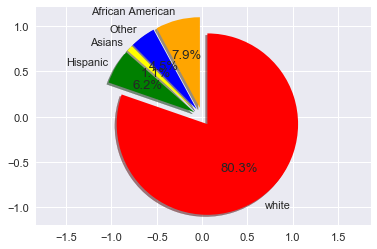

In [39]:
fig = plt.figure(figsize=(10,10))
labels = 'African American','Other', 'Asians','Hispanic','white'
sizes = [7.9, 4.5, 1.1, 6.2,80.3]
explode = (0.1, 0.1, 0.1, 0.1 ,0.1)  
colors = ["orange", "blue","yellow","green","red"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90, frame=True)
ax1.axis('equal')  
plt.show()

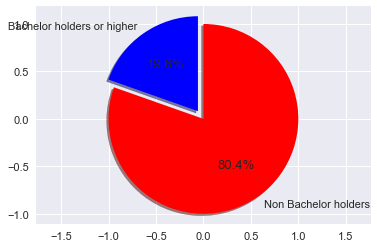

In [41]:
fig = plt.figure(figsize=(10,10))
labels = 'Bachelor holders or higher','Non Bachelor holders'
sizes = [19.6, 80.4]
explode = (0.1, 0)  
colors = ["blue","red"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90, frame=True)
ax1.axis('equal')  
plt.show()